In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sales = pd.read_csv("https://raw.githubusercontent.com/GerhardTrippen/DataSets/master/sample-salesv2.csv", parse_dates=['date'])
sales.head()
sales.dtypes

sales.describe()

sales['unit price'].describe()


count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

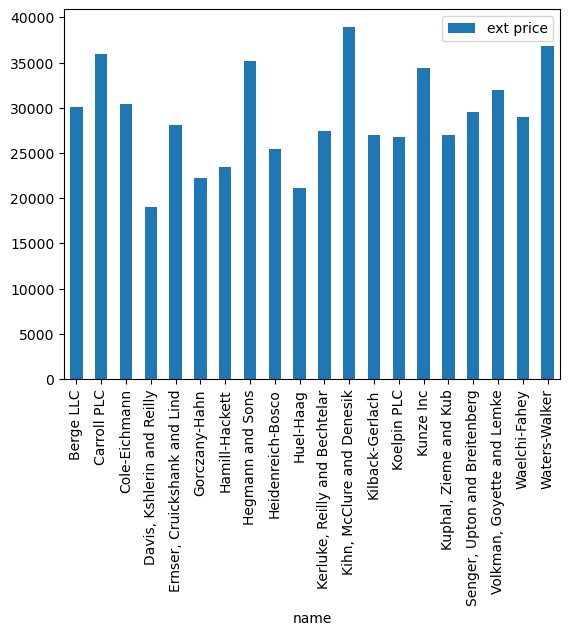

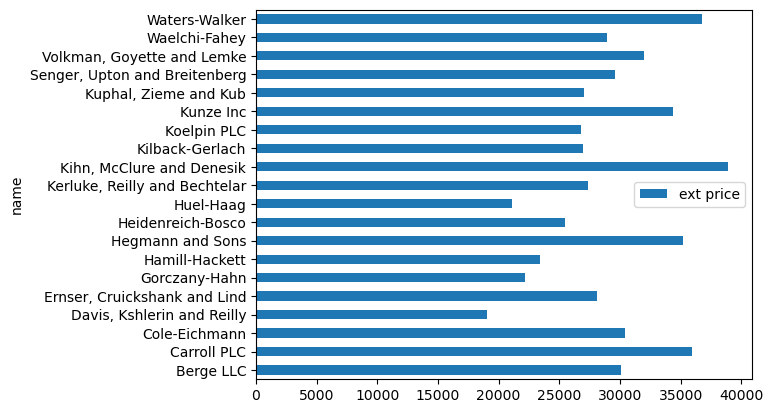

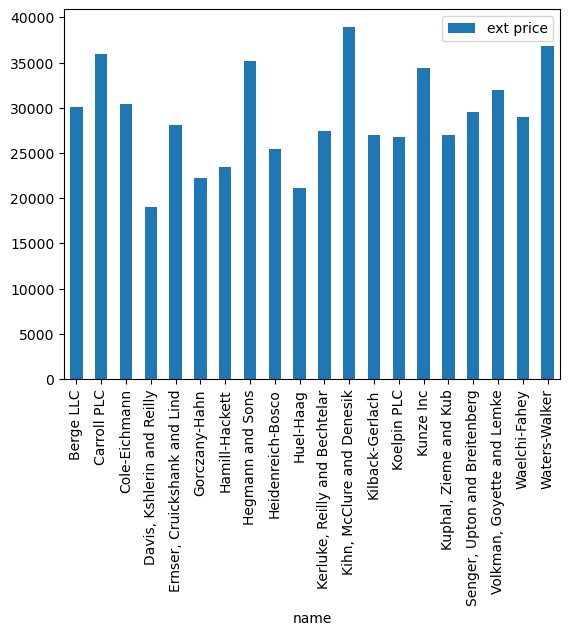

In [2]:
customers = sales[['name','ext price','date']]
customers.head()

customer_group = customers.groupby('name')
customer_group.size()

sales_totals = customer_group.sum()
sales_totals.sort_values('ext price').head()

my_plot = sales_totals.plot(kind='bar')
my_plot = sales_totals.plot(kind='barh')

# identical
my_plot = sales_totals.plot.bar()

Text(0, 0.5, 'Sales ($)')

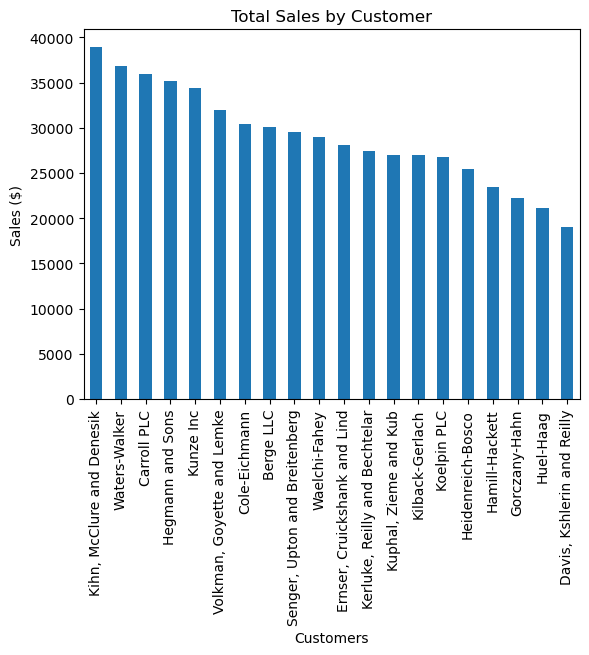

In [3]:
my_plot = sales_totals.sort_values('ext price', ascending=False).plot(kind='bar', legend=None, title="Total Sales by Customer")

my_plot.set_xlabel("Customers")

my_plot.set_ylabel("Sales ($)")


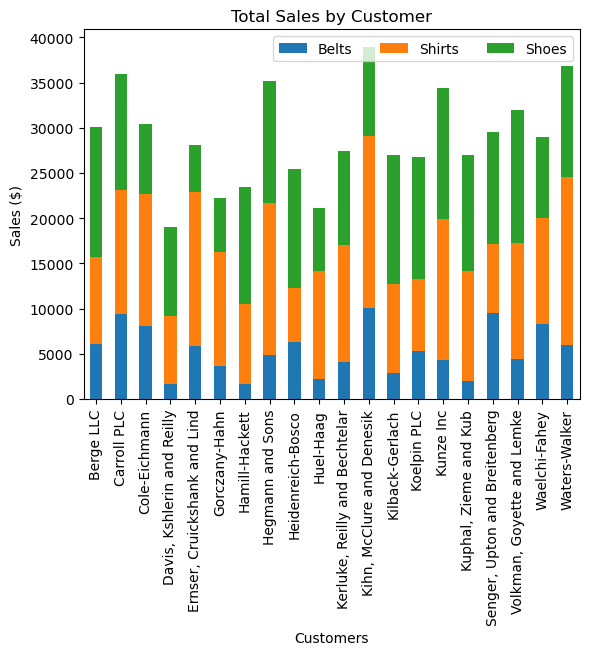

In [4]:
customers = sales[['name', 'category', 'ext price', 'date']]
customers.head()
category_group = customers.groupby(['name','category']).sum()
category_group.head(10)
category_group = category_group.unstack()
category_group.head(10)
my_plot = category_group.plot(kind='bar', stacked=True, title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
my_plot.legend(["Belts","Shirts","Shoes"], loc='best', ncol=3)

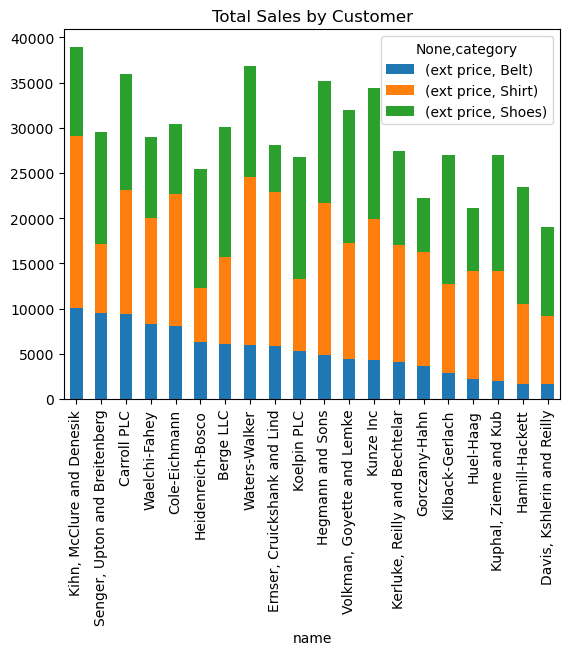

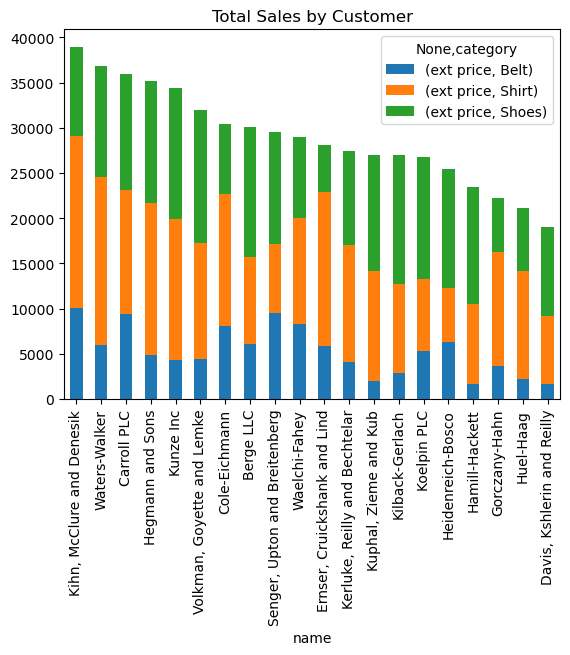

In [5]:
category_group = category_group.sort_values(('ext price', 'Belt'), ascending=False)
category_group.head()
my_plot = category_group.plot(kind='bar', stacked=True, title="Total Sales by Customer")

# sort by total without showing total!
category_group['total'] = category_group.sum(axis=1)
category_group = category_group.sort_values('total', ascending=False)
category_group.head()
category_group.drop('total', axis=1, inplace=True)
my_plot = category_group.plot(kind='bar', stacked=True, title="Total Sales by Customer")


Text(0, 0.5, 'Number of Orders')

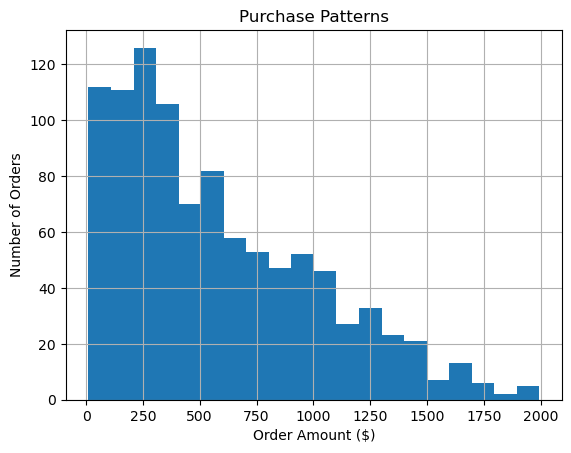

In [6]:
purchase_patterns = sales[['category','ext price','date']]
purchase_patterns.head()

purchase_plot = purchase_patterns['ext price'].hist(bins=20)

# done many times now, 
# but should always be done to make figure self-explanatory
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount ($)")
purchase_plot.set_ylabel("Number of Orders")

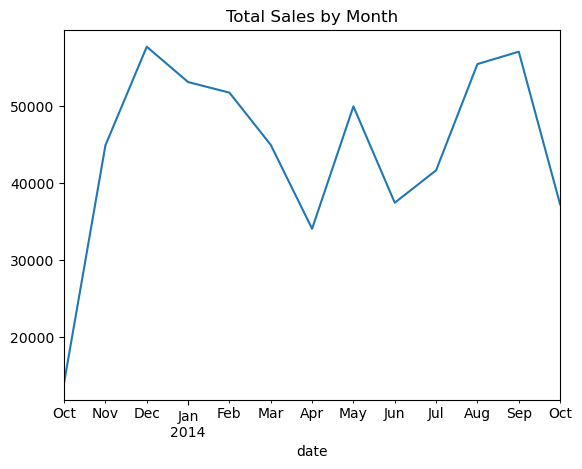

In [7]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

# sorted by time
purchase_patterns.sort_index()

# resampled by months
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month", legend=None)

# save the figure
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")

(0.0, 28565.6885)

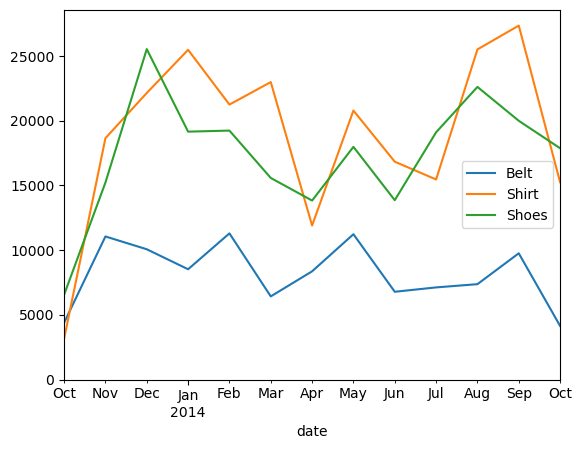

In [8]:
fig, ax = plt.subplots()

# key gives the group name (i.e., category), data gives the actual values
for key, data in purchase_patterns.groupby('category'):
    data.resample('M').sum().plot(y='ext price', ax=ax, label=key)

# change y range to start from 0 with matplotlib
ax.set_ylim(bottom=0)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 [Text(1, 0, 'Berge LLC'),
  Text(2, 0, 'Carroll PLC'),
  Text(3, 0, 'Cole-Eichmann'),
  Text(4, 0, 'Davis, Kshlerin and Reilly'),
  Text(5, 0, 'Ernser, Cruickshank and Lind'),
  Text(6, 0, 'Gorczany-Hahn'),
  Text(7, 0, 'Hamill-Hackett'),
  Text(8, 0, 'Hegmann and Sons'),
  Text(9, 0, 'Heidenreich-Bosco'),
  Text(10, 0, 'Huel-Haag'),
  Text(11, 0, 'Kerluke, Reilly and Bechtelar'),
  Text(12, 0, 'Kihn, McClure and Denesik'),
  Text(13, 0, 'Kilback-Gerlach'),
  Text(14, 0, 'Koelpin PLC'),
  Text(15, 0, 'Kunze Inc'),
  Text(16, 0, 'Kuphal, Zieme and Kub'),
  Text(17, 0, 'Senger, Upton and Breitenberg'),
  Text(18, 0, 'Volkman, Goyette and Lemke'),
  Text(19, 0, 'Waelchi-Fahey'),
  Text(20, 0, 'Waters-Walker')])

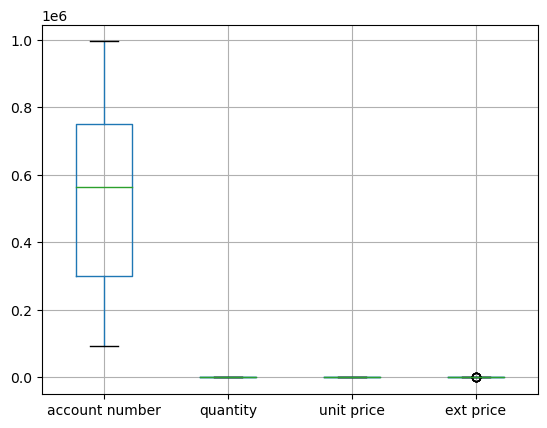

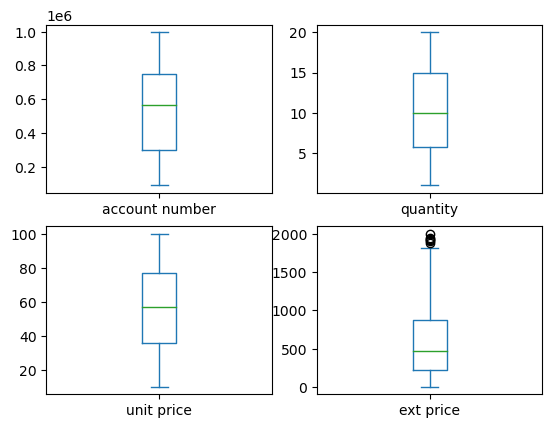

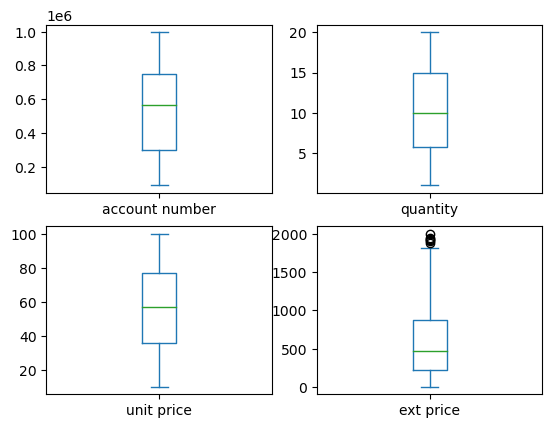

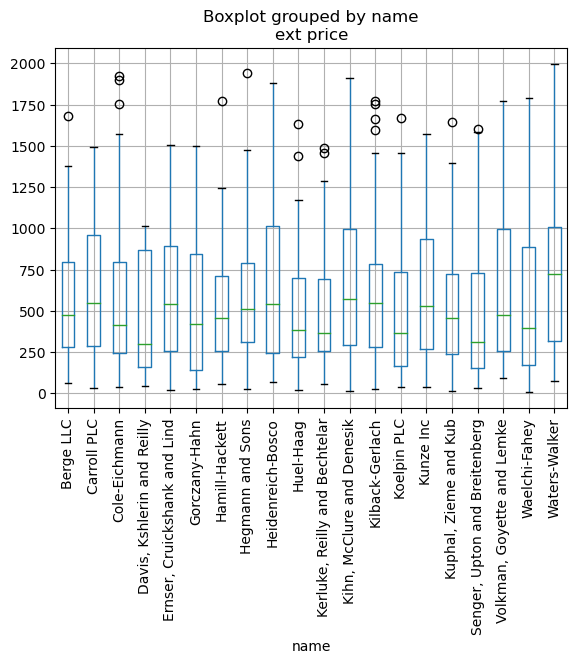

In [9]:
# Box and Whisker Plots
sales.boxplot()    # Not very useful!

# Four boxplots in one figure with individual scales
sales.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# This was not working for some time in some pandas versions because of the date column, so:
sales.drop('date',axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

# Individual boxplots for all names
sales.boxplot(column="ext price", by="name")
plt.xticks(rotation='vertical')

array([[<AxesSubplot:title={'center':'Berge LLC'}>,
        <AxesSubplot:title={'center':'Carroll PLC'}>,
        <AxesSubplot:title={'center':'Cole-Eichmann'}>,
        <AxesSubplot:title={'center':'Davis, Kshlerin and Reilly'}>],
       [<AxesSubplot:title={'center':'Ernser, Cruickshank and Lind'}>,
        <AxesSubplot:title={'center':'Gorczany-Hahn'}>,
        <AxesSubplot:title={'center':'Hamill-Hackett'}>,
        <AxesSubplot:title={'center':'Hegmann and Sons'}>],
       [<AxesSubplot:title={'center':'Heidenreich-Bosco'}>,
        <AxesSubplot:title={'center':'Huel-Haag'}>,
        <AxesSubplot:title={'center':'Kerluke, Reilly and Bechtelar'}>,
        <AxesSubplot:title={'center':'Kihn, McClure and Denesik'}>],
       [<AxesSubplot:title={'center':'Kilback-Gerlach'}>,
        <AxesSubplot:title={'center':'Koelpin PLC'}>,
        <AxesSubplot:title={'center':'Kunze Inc'}>,
        <AxesSubplot:title={'center':'Kuphal, Zieme and Kub'}>],
       [<AxesSubplot:title={'center':'Seng

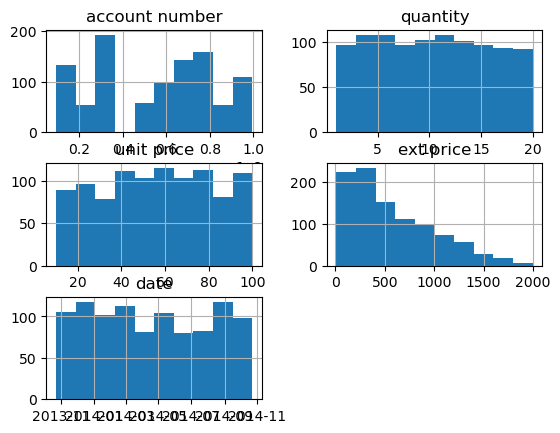

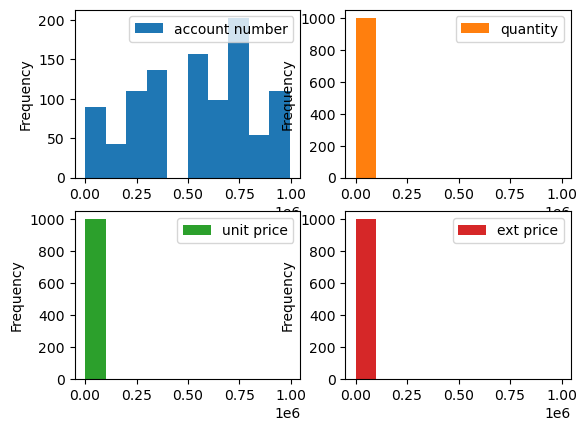

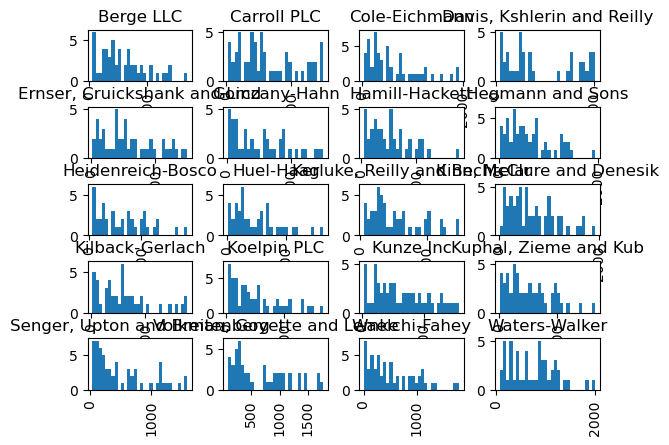

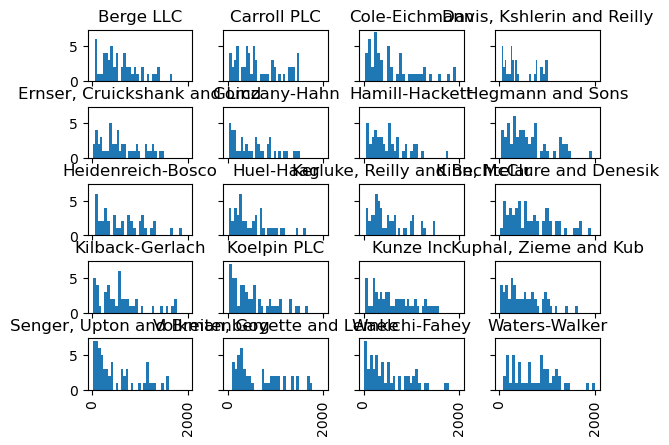

In [10]:
# Histograms
sales.hist()

# for individual variables in one plot
sales.drop('date',axis=1).plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)  # "ignored", unfortunately

# individual plots for individual customers
sales.hist(column="ext price", by="name", bins=30)

# same axes for comparison
sales.hist(column="ext price", by="name", bins=30, sharex=True, sharey=True)
